In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
X = df.copy()
y = X.pop('deposit')

In [7]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown


In [8]:
y.head()

0    yes
1    yes
2    yes
3    yes
4    yes
Name: deposit, dtype: object

In [9]:
f1=lambda x:1 if x=='yes' else 0

In [10]:
y1=y.map(f1)
y1

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [11]:
preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
     (OneHotEncoder(sparse=False),
      make_column_selector(dtype_include=object)),
)

In [12]:
X = preprocessor.fit_transform(X)
y = y1

In [13]:
input_shape = [X.shape[1]]
print('Input shape: {}'.format(input_shape))

Input shape: [51]


In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [15]:
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,1.491505,0.252525,-1.265746,1.930226,-0.554168,-0.481184,-0.36326,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.239676,-0.459974,-1.265746,3.154612,-0.554168,-0.481184,-0.36326,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.019470,-0.080160,-1.265746,2.929901,-0.554168,-0.481184,-0.36326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.155733,0.293762,-1.265746,0.596366,-0.554168,-0.481184,-0.36326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.071790,-0.416876,-1.265746,0.867171,-0.186785,-0.481184,-0.36326,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
X_train = pd.DataFrame(X).sample(frac=0.7,random_state=0)
X_valid = pd.DataFrame(X).drop(X_train.index)

In [17]:
y_train = pd.DataFrame(y).sample(frac=0.7,random_state=0)
y_valid = pd.DataFrame(y).drop(y_train.index)

In [18]:
print(X_train.shape,X_valid.shape)

(7813, 51) (3349, 51)


In [ ]:
modelB1= keras.Sequential([
                           layers.Dense(units=512, activation='sigmoid', input_shape=[51]),
                           layers.Dense(units=512, activation='sigmoid'),
                           layers.Dense(units=512, activation='sigmoid'),
                           layers.Dense(units=1),
])

In [ ]:
modelB1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               26624     
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 513       
Total params: 552,449
Trainable params: 552,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelB1.compile(optimizer='adam',loss='mae')

In [ ]:
history1 = modelB1.fit(
    X_train,y_train,
    validation_data=(X_valid,y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
31/31 [==============================] - 1s 31ms/step - loss: 0.5728 - val_loss: 0.4763
Epoch 2/10
31/31 [==============================] - 1s 25ms/step - loss: 0.4876 - val_loss: 0.4678
Epoch 3/10
31/31 [==============================] - 1s 24ms/step - loss: 0.4204 - val_loss: 0.3650
Epoch 4/10
31/31 [==============================] - 1s 25ms/step - loss: 0.3387 - val_loss: 0.3134
Epoch 5/10
31/31 [==============================] - 1s 26ms/step - loss: 0.3141 - val_loss: 0.3066
Epoch 6/10
31/31 [==============================] - 1s 25ms/step - loss: 0.3027 - val_loss: 0.2970
Epoch 7/10
31/31 [==============================] - 1s 24ms/step - loss: 0.2996 - val_loss: 0.2929
Epoch 8/10
31/31 [==============================] - 1s 25ms/step - loss: 0.2997 - val_loss: 0.3129
Epoch 9/10
31/31 [==============================] - 1s 25ms/step - loss: 0.2992 - val_loss: 0.2891
Epoch 10/10
31/31 [==============================] - 1s 25ms/step - loss: 0.2873 - val_loss: 0.2945


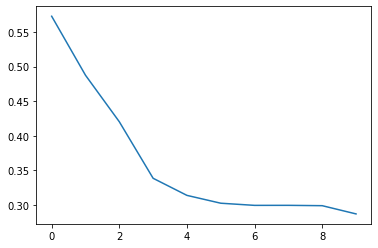

In [ ]:
history_df1 = pd.DataFrame(history1.history)
history_df1['loss'].plot()

In [19]:
modelB2= keras.Sequential([
                           layers.Dense(units=128, activation='sigmoid', input_shape=[51]),
                           layers.Dense(units=128, activation='sigmoid'),
                           layers.Dense(units=64, activation='sigmoid'),
                           layers.Dense(units=1),
])

In [20]:
modelB2.compile(optimizer='adam',loss='mae')

In [21]:
modelB2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               6656      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 31,489
Trainable params: 31,489
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = modelB2.fit(
    X_train,y_train,
    validation_data=(X_valid,y_valid),
    batch_size=128,
    epochs=200,
)

Epoch 1/200
62/62 [==============================] - 1s 6ms/step - loss: 0.4812 - val_loss: 0.4580
Epoch 2/200
62/62 [==============================] - 0s 3ms/step - loss: 0.4127 - val_loss: 0.3462
Epoch 3/200
62/62 [==============================] - 0s 3ms/step - loss: 0.3295 - val_loss: 0.3056
Epoch 4/200
62/62 [==============================] - 0s 4ms/step - loss: 0.3046 - val_loss: 0.2993
Epoch 5/200
62/62 [==============================] - 0s 3ms/step - loss: 0.2974 - val_loss: 0.2948
Epoch 6/200
62/62 [==============================] - 0s 3ms/step - loss: 0.2937 - val_loss: 0.2870
Epoch 7/200
62/62 [==============================] - 0s 4ms/step - loss: 0.2841 - val_loss: 0.2834
Epoch 8/200
62/62 [==============================] - 0s 4ms/step - loss: 0.2809 - val_loss: 0.2764
Epoch 9/200
62/62 [==============================] - 0s 3ms/step - loss: 0.2776 - val_loss: 0.2839
Epoch 10/200
62/62 [==============================] - 0s 3ms/step - loss: 0.2750 - val_loss: 0.2637
Epoch 11/

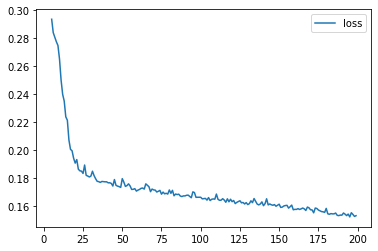

In [23]:
history_df = pd.DataFrame(history.history)
history_df.loc[5:,['loss']].plot()